# Welcome to My Notebook!

Hello and welcome! Thank you for taking the time to explore this notebook. In this notebook, I will walk you through [briefly explain the content or goal of your notebook]. 

If you find this notebook helpful or insightful, I would truly appreciate it if you could give an upvote! Your support helps others discover useful content and motivates me to create more.

## Content

Hello and welcome! In this notebook, I will guide you through the process of analyzing and predicting heart disease using a dataset containing key features related to heart health. The goal of this notebook is to build a machine learning model that can predict the likelihood of heart disease based on various input features such as age, blood pressure, cholesterol levels, and more.

Throughout this notebook, we will:
- Explore and preprocess the dataset
- Perform exploratory data analysis (EDA) to uncover patterns and insights
- Train machine learning models for heart disease prediction
- Evaluate and fine-tune the model to improve accuracy

In [1]:
!pip install plotly

#imports
#data management
import pandas as pd
import numpy as np
#model selection
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#extra
import warnings
warnings.filterwarnings("ignore")



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#load data
db = pd.read_csv("heart2.csv")
#we will use copy of our data for visualization and analysis
db_copy = db.copy()

<a id =1></a>
# Exploratory Analysis

In [3]:
#fist 5 samples
db.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
#info
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<font color = #8B0000>
As it can be seen we have no null values
</font>

In [5]:
#statistic informations
db.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<font color = #8B0000>
We will normalize the data to get more accurate score</br>
Normalizing means fitting our data into 0 and 1 </br>
We will talk more about it later</br>
</font>

In [6]:
db['ChestPainType'].unique

<bound method Series.unique of 0      ATA
1      NAP
2      ATA
3      ASY
4      NAP
      ... 
913     TA
914    ASY
915    ASY
916    ATA
917    NAP
Name: ChestPainType, Length: 918, dtype: object>

In [7]:
#value counts of categorical features
categoricalfeatures = ["ChestPainType","RestingECG","Sex","ExerciseAngina","ST_Slope"]
for i in categoricalfeatures:
    print(db[i].value_counts())
    print("***************************")
    

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
***************************
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
***************************
Sex
M    725
F    193
Name: count, dtype: int64
***************************
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
***************************
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
***************************


### İntroduction of all features

| Feature          | Description                                                                                   |
|------------------|-----------------------------------------------------------------------------------------------|
| **Age**          | Age of the patient [years]                                                                    |
| **Sex**          | Sex of the patient [M: Male, F: Female]                                                       |
| **ChestPainType**| Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| **RestingBP**    | Resting blood pressure [mm Hg]                                                                |
| **Cholesterol**  | Serum cholesterol [mm/dl]                                                                     |
| **FastingBS**    | Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]                               |
| **RestingECG**   | Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| **MaxHR**        | Maximum heart rate achieved [Numeric value between 60 and 202]                                |
| **ExerciseAngina**| Exercise-induced angina [Y: Yes, N: No]                                                      |
| **Oldpeak**      | Oldpeak = ST depression [Numeric value measured in depression]                                |
| **ST_Slope**     | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]      |
| **HeartDisease** | Output class [1: heart disease, 0: Normal]                                                   |


## Multivariate Analysis

### MaxHr - Age

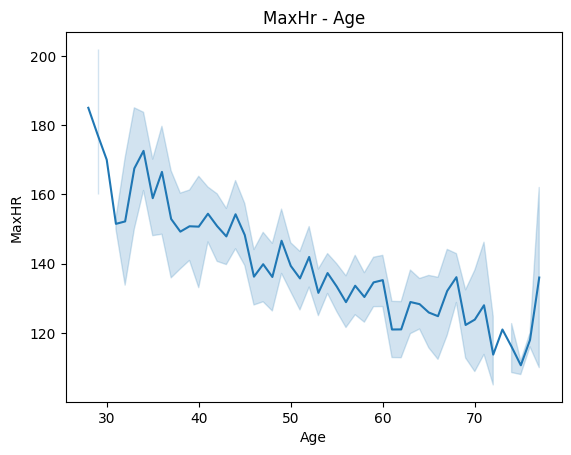

In [8]:
sns.lineplot(db_copy , x = "Age" , y = "MaxHR")
plt.title("MaxHr - Age")
plt.show()

### 

<font color = red>Which means younger people have more MaxHR rate than older people</font>


### RestingBP - Cholesterol

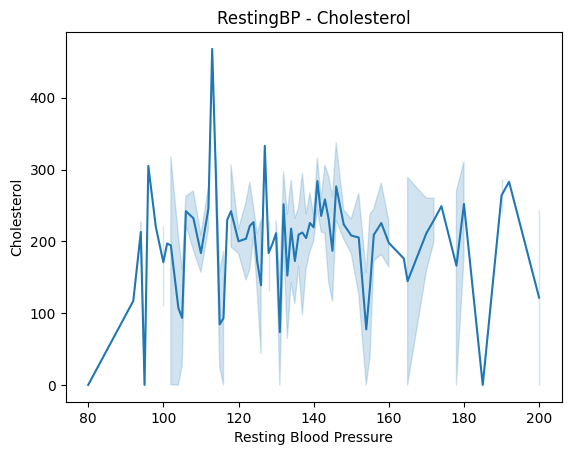

In [9]:
restingbp = [None if each == 0 else each for each in db_copy["RestingBP"]]
sns.lineplot(db_copy , x = restingbp , y = "Cholesterol")
plt.xlabel("Resting Blood Pressure")
plt.title("RestingBP - Cholesterol")
plt.show()


<font color = red>It seems restingbp has nothing to do with cholestorol</font>


### RestingBP - Age

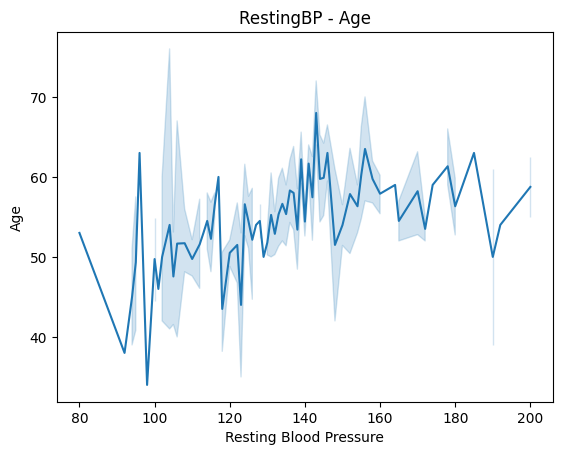

In [10]:
sns.lineplot(db_copy , x = restingbp , y = "Age")
plt.xlabel("Resting Blood Pressure")
plt.title("RestingBP - Age")
plt.show()


<font color = red>It seems that as age increases, resting blood pressure also increases.</font>

<a id =2></a>
# Visualization

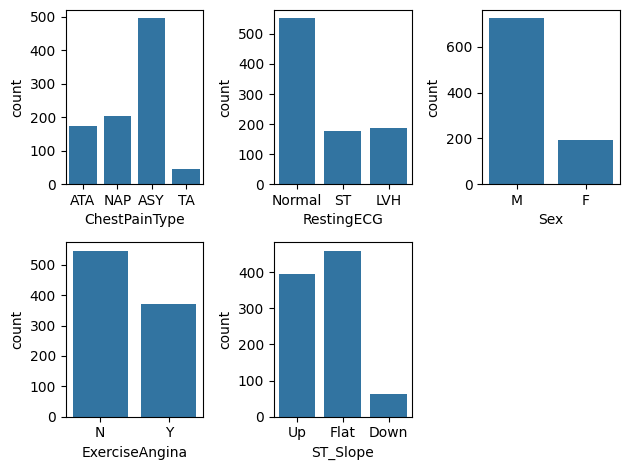

In [11]:
categoricalfeatures = ["ChestPainType","RestingECG","Sex","ExerciseAngina","ST_Slope"]
for i in categoricalfeatures:
    ax = plt.subplot(2,3,categoricalfeatures.index(i)+1)
    sns.countplot(x= db_copy[i])
    plt.tight_layout()
plt.show()
    

<font color = #8B0000>
As it can be seen number of males is much bigger than number of females</br>
Lets see how much these features effect HeartDisease risk
</font>


### The degree to which different categorical features contribute to heart attack risk.

In [12]:
#Sex
maleHeartDiseaseRate = db_copy[(db_copy["Sex"] == "M") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["Sex"] == "M"].shape[0]
femaleHeartDiseaseRate = db_copy[(db_copy["Sex"] == "F") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["Sex"] == "F"].shape[0]
#chestpaintype
ataChestPainTypeHeartDiseaseRate = db_copy[(db_copy["ChestPainType"] == "ATA") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ChestPainType"] == "ATA"].shape[0]
napChestPainTypeHeartDiseaseRate = db_copy[(db_copy["ChestPainType"] == "NAP") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ChestPainType"] == "NAP"].shape[0]
asyChestPainTypeHeartDiseaseRate = db_copy[(db_copy["ChestPainType"] == "ASY") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ChestPainType"] == "ASY"].shape[0]
taChestPainTypeHeartDiseaseRate = db_copy[(db_copy["ChestPainType"] == "TA") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ChestPainType"] == "TA"].shape[0]
#restingecg
normalRestingEcgRate = db_copy[(db_copy["RestingECG"] == "Normal") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["RestingECG"] == "Normal"].shape[0]
stRestingEcgRate = db_copy[(db_copy["RestingECG"] == "ST") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["RestingECG"] == "ST"].shape[0]
lvhRestingEcgRate = db_copy[(db_copy["RestingECG"] == "LVH") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["RestingECG"] == "LVH"].shape[0]
#ExerciseAngina
NExerciseAnginaRate = db_copy[(db_copy["ExerciseAngina"] == "N") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ExerciseAngina"] == "N"].shape[0]
YExerciseAnginaRate= db_copy[(db_copy["ExerciseAngina"] == "Y") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ExerciseAngina"] == "Y"].shape[0]
#ST_Slope
upStSlopeRate=db_copy[(db_copy["ST_Slope"] == "Up") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ST_Slope"] == "Up"].shape[0]
flatStSlopeRate=db_copy[(db_copy["ST_Slope"] == "Flat") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ST_Slope"] == "Flat"].shape[0]
downStSlopeRate=db_copy[(db_copy["ST_Slope"] == "Down") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ST_Slope"] == "Down"].shape[0]

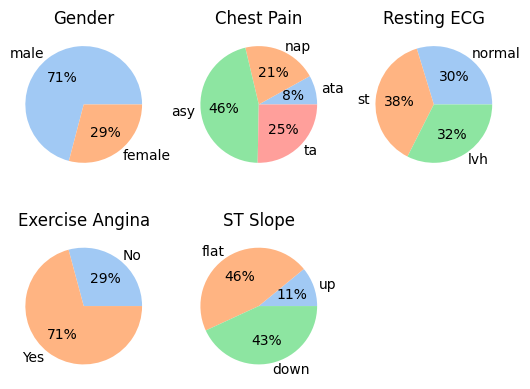

In [13]:
#Visualization
#rates
genderrate = [maleHeartDiseaseRate,femaleHeartDiseaseRate]
chestpaintyperate = [ataChestPainTypeHeartDiseaseRate,napChestPainTypeHeartDiseaseRate,asyChestPainTypeHeartDiseaseRate,taChestPainTypeHeartDiseaseRate]
restingecgrate = [normalRestingEcgRate,stRestingEcgRate,lvhRestingEcgRate]
exerciseAnginarate = [NExerciseAnginaRate,YExerciseAnginaRate]
stsloperate = [upStSlopeRate,flatStSlopeRate,downStSlopeRate]
rates = [genderrate,chestpaintyperate,restingecgrate,exerciseAnginarate,stsloperate]
#labels
genderlabels = ["male", "female"]
chestpainlabels = ["ata","nap","asy","ta"]
restingecglabels = ["normal","st","lvh"]
exerciseAnginalabels = ["No" , "Yes"]
stslopelabels = ["up","flat","down"]
labels = [genderlabels,chestpainlabels,restingecglabels,exerciseAnginalabels,stslopelabels]
titles = ["Gender","Chest Pain" , "Resting ECG" , "Exercise Angina" , "ST Slope"]


for i in range(0,5):
    plt.subplot(2, 3,i+1)
    plt.title(titles[i])
    plt.pie(rates[i],labels = labels[i],autopct='%.0f%%',colors = sns.color_palette("pastel"))



Results:
1. Males have bigger change to get heart disease
2. Those who have Asymptomatic (asy) have bigger change to get heart disease
3. Resting ecg values are close to each other so we dont have to think about it
4. Those with exercise-induced angina are at a significantly higher risk of having heart disease.
5. The higher heart disease rates in the ST slope down and ST slope flat categories compared to ST slope up are likely due to the greater number of individuals with chronic conditions like ischemia or coronary artery disease (CAD), which are more common. ST slope up typically indicates acute conditions like STEMI, which are less frequent and treated quickly, leading to a lower heart disease rate in this group.

### The degree to which different continuous features contribute to heart attack risk.

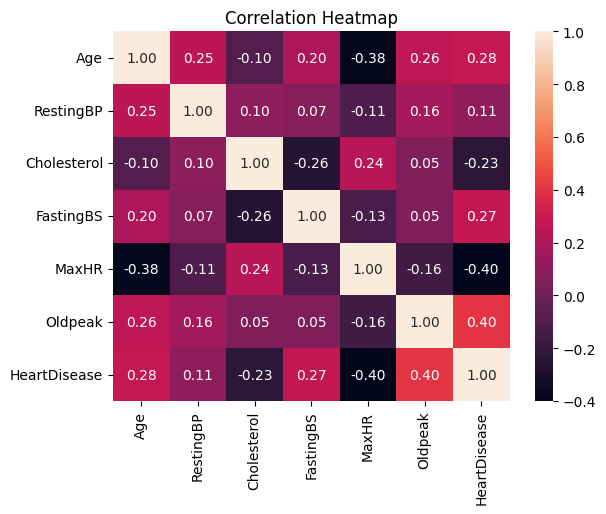

In [14]:
corrdb = db_copy.loc[:,["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"]]
sns.heatmap(corrdb.corr(),fmt = ".2f",annot = True)
plt.title("Correlation Heatmap")
plt.show()

## Visualization of most correlated features

### MaxHR - Age

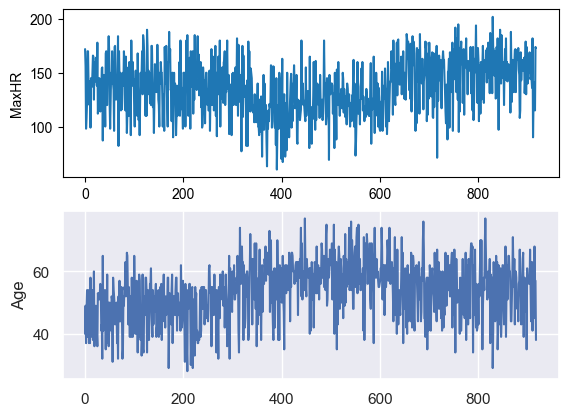

In [15]:
plt.subplot(2,1,1)
sns.set(rc={'figure.figsize':(10, 10)})
sns.lineplot(db_copy["MaxHR"])
plt.subplot(2,1,2)
sns.lineplot(db_copy["Age"])
plt.show()

<font color = red>As it can be seen when Age decreases MaxHr increases vice versa</font>


### MaxHR - Cholesterol


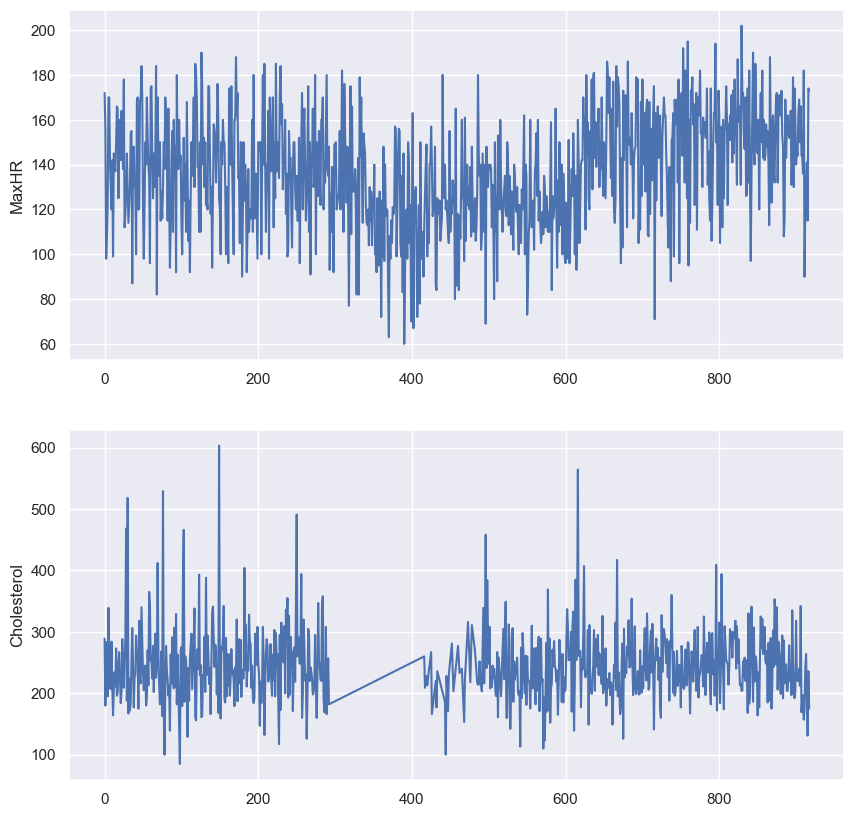

In [16]:
cholesterol = db_copy[db_copy["Cholesterol"] !=0]["Cholesterol"]
plt.subplot(2,1,1)
sns.set(rc={'figure.figsize':(10, 5)})
sns.lineplot(db_copy["MaxHR"])
plt.subplot(2,1,2)
sns.lineplot(cholesterol)
plt.show()

# Feature Engineering

##

In [17]:
#Split data
y_db = db.loc[:,"HeartDisease"]
db.drop("HeartDisease",inplace = True,axis = 1)
x_db = db

In [18]:
x_db

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


## Normalizing

> Normalizing features ensures that all variables have the same scale, improving model performance, convergence speed, and accuracy, especially for algorithms sensitive to feature magnitude differences.


In [19]:
featurelist = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]
for i in featurelist:
    x_db[i] = [ (each - np.min(x_db[i])) / (np.max(x_db[i])-np.min(x_db[i]))   for each in x_db[i]]

## Label Encoding

> One-Hot Encoding is a technique that converts categorical variables into a series of binary columns, where each column represents one category, with 1 indicating the presence of that category and 0 otherwise.



> One-Hot Encoding converts each category into a separate binary column, while Label Encoding assigns a unique integer to each category; One-Hot Encoding is typically used for nominal data, and Label Encoding for ordinal data.


In [20]:
x_db = pd.get_dummies(x_db , columns = ["ChestPainType","RestingECG","Sex","ExerciseAngina","ST_Slope"],dtype = int)

In [21]:
#our new database
x_db

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0,1,0,0,0,1,0,0,1,1,0,0,0,1
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,0,0,1,0,0,1,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0,1,0,0,0,0,1,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1,0,0,0,0,1,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0,0,1,0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,0,0,0,1,0,1,0,0,1,1,0,0,1,0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1,0,0,0,0,1,0,0,1,1,0,0,1,0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1,0,0,0,0,1,0,0,1,0,1,0,1,0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,0,1,0,0,1,0,0,1,0,1,0,0,1,0


# Prediction


In [22]:
#train-test split
x_train , x_test , y_train , y_test = train_test_split(x_db , y_db)

In [23]:
#with train-test split
logreg = LogisticRegression()
gaussiannb = GaussianNB()
dectree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
svm = SVC()
knearest = KNeighborsClassifier()
labelList = ["LogReg : " , "GaussianNb : " , "DecTree : ","RandomForest : ","Svm : " , "knearest : "]
classifierList = [logreg , gaussiannb , dectree , randomforest , svm,knearest]
for i in range(0,6):
    classifier = classifierList[i]
    classifier.fit(x_train , y_train)
    print("Score of" ,labelList[i] , classifier.score(x_test,y_test))

Score of LogReg :  0.8521739130434782
Score of GaussianNb :  0.8434782608695652
Score of DecTree :  0.7782608695652173
Score of RandomForest :  0.8608695652173913
Score of Svm :  0.8391304347826087
Score of knearest :  0.8347826086956521


Actually these scores are going to decrease when working with real data

In [24]:
#Cross validation
logreg = LogisticRegression()
gaussiannb = GaussianNB()
dectree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
svm = SVC()
knearest = KNeighborsClassifier()
labelList = ["LogReg : " , "GaussianNb : " , "DecTree : ","RandomForest : ","Svm : ", "knearest : "]
classifierList = [logreg , gaussiannb , dectree , randomforest , svm,knearest]
for i in range(0,6):
    classifier = classifierList[i]
    classifier.fit(x_train , y_train)
    scores = cross_val_score(classifier, x_train , y_train,n_jobs = 5)
    print("Score of" ,labelList[i] , np.mean(scores))

Score of LogReg :  0.8663175711414366
Score of GaussianNb :  0.8648365598222787
Score of DecTree :  0.8052893261398498
Score of RandomForest :  0.87359568390987
Score of Svm :  0.8590606156775629
Score of knearest :  0.8357875806622236


As it can be seen cross-validation-score are lower than train-test split score

In [25]:
#HyperParameterTuning
params = [
    
     {
         #logisticregression
        "C" : [0.01 , 0.1 , 1 , 10 , 100],
        "max_iter" : [100 , 150 , 200],
        "penalty" : ["l1" , "l2"],
        "solver" : ["lbfgs", "liblinear", "newton-cg"],
    },
    
    {
        #decisiontree
        "min_samples_leaf" : [1 , 5 , 10],
        "min_samples_split" : [3 , 5 , 10 , 20],
        "criterion" : ["gini" , "entropy"],
        },
    {
        #randomforest
    # cause it takes too much time to try all the different parameter options I used the 
    # most accurate parameters that I found
       'criterion': ['entropy'],
         'min_samples_split': [20],
         'n_estimators': [50],
        
    },
    #naive - bayes
    {
        "var_smoothing" : [1e-9 , 1e-8 , 1e-7]
    } ,
    #knearest
    {
        "n_neighbors":[3,5,10,20,30],
    "weights":["uniform","distance"],
    "metric":["eucladian","manhattan"],
    },
#svc
{
                    "C":[1,10,50,300,500],
                  "gamma":[0.1,0.01,0.001,0.0001,1],
    
},
]

In [26]:
X_train,X_val,Y_train,Y_val = train_test_split(x_train,y_train)
logreg = LogisticRegression()
dectree = DecisionTreeClassifier()
randforest = RandomForestClassifier()
gaussiannb = GaussianNB()
knearest = KNeighborsClassifier()
svc = SVC()
modellist = {
   'logreg': logreg,
 'dectree': dectree,
 'randforest': randforest,
 'gaussiannb': gaussiannb,
 'knearest': knearest,
 'svc': svc,}
i = 0
for key , value in modellist.items():
   clf = GridSearchCV(value , params[i])
   clf.fit(X_train,Y_train)
   print(key,": ", clf.score(X_val,Y_val)) 
   i+=1

logreg :  0.8488372093023255
dectree :  0.8313953488372093
randforest :  0.872093023255814
gaussiannb :  0.8662790697674418
knearest :  0.8488372093023255
svc :  0.8662790697674418


<font color ="blue">
First of all we split our train data to second train data and validation data </br>
we used validation data as test data to find best parameters
</font>

Sklearn cross validation doc: https://scikit-learn.org/1.5/modules/cross_validation.html

<font color = "blue">
Cross validation score of our models with real test data
</font>

In [27]:
i = 0
for key , value in modellist.items():
   clf = GridSearchCV(value , params[i])
   clf.fit(X_train,Y_train)
   print(key,": ", clf.score(x_test,y_test)) 
   i+=1

logreg :  0.8478260869565217
dectree :  0.8043478260869565
randforest :  0.8478260869565217
gaussiannb :  0.8391304347826087
knearest :  0.8521739130434782
svc :  0.8478260869565217


## Prediction with artifical neural networks

<font color = "blue">We are gonna use keras </br> Keras Documents : https://keras.io/api/ </font>

In [32]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Input(shape = (20,))) #we have 20 features thats why our input layer has 20 neurons
model.add(Dense(activation = "relu" , units = 32))
model.add(Dense(activation = "relu" , units = 32))
model.add(Dense(activation = "relu" , units = 8))
model.add(Dense(activation = "softmax" , units = 2))
model.compile(metrics = ["accuracy"] , optimizer = Adam(learning_rate = 0.0001) , loss = "sparse_categorical_crossentropy")
our_model = model.fit(x = x_train , y = y_train , batch_size = 30 , epochs = 200 ,shuffle = True , verbose = 2,validation_data=(x_test, y_test))




Epoch 1/200



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


23/23 - 1s - 47ms/step - accuracy: 0.4535 - loss: 0.7266 - val_accuracy: 0.4435 - val_loss: 0.7259
Epoch 2/200
23/23 - 0s - 3ms/step - accuracy: 0.4666 - loss: 0.7119 - val_accuracy: 0.4609 - val_loss: 0.7126
Epoch 3/200
23/23 - 0s - 3ms/step - accuracy: 0.4913 - loss: 0.6985 - val_accuracy: 0.4870 - val_loss: 0.7001
Epoch 4/200
23/23 - 0s - 3ms/step - accuracy: 0.5392 - loss: 0.6856 - val_accuracy: 0.5391 - val_loss: 0.6867
Epoch 5/200
23/23 - 0s - 3ms/step - accuracy: 0.6134 - loss: 0.6716 - val_accuracy: 0.5957 - val_loss: 0.6734
Epoch 6/200
23/23 - 0s - 3ms/step - accuracy: 0.6628 - loss: 0.6573 - val_accuracy: 0.6261 - val_loss: 0.6595
Epoch 7/200
23/23 - 0s - 3ms/step - accuracy: 0.6977 - loss: 0.6425 - val_accuracy: 0.6870 - val_loss: 0.6460
Epoch 8/200
23/23 - 0s - 3ms/step - accuracy: 0.7195 - loss: 0.6279 - val_accuracy: 0.7043 - val_loss: 0.6322
Epoch 9/200
23/23 - 0s - 3ms/step - accuracy: 0.7456 - loss: 0.6122 - val_accuracy: 0.7217 - val_loss: 0.6186
Epoch 10/200
23/23 - 

In [29]:
# Save the model in SavedModel format
model.save('my_model.keras')


<h3>With thousand iteration we can get %93 acc rate but we dont know that our data is overfitted to train data</br>
</br>
To learn it:</h3>

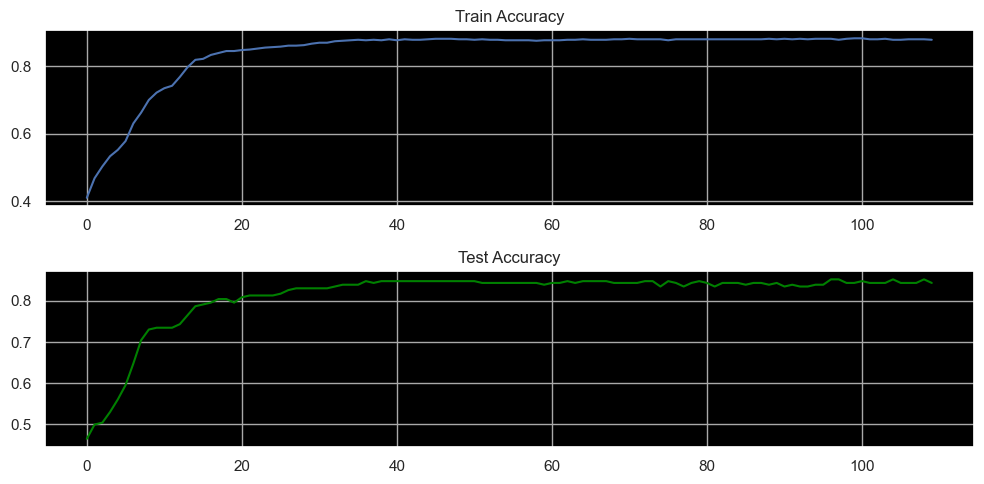

In [30]:
train_acc = our_model.history["accuracy"]
test_acc = our_model.history["val_accuracy"]

#first plot
plt.subplot(2,1,1)
plt.title("Train Accuracy")
plt.plot(train_acc)
ax1 = plt.gca()
ax1.set_facecolor('black') 
ax1.grid(True , color = "#A9A9A9")
#second plot
plt.subplot(2,1,2)
plt.title("Test Accuracy")
plt.plot(test_acc,color = "green")
ax2 = plt.gca()
ax2.set_facecolor('black') 
ax2.grid(True , color = "#A9A9A9")


plt.tight_layout()
plt.show()

<font color = "blue">
<h4>
If the train accuracy was increasing while the test accuracy was decreasing, we could have said that our model was overfitting. However, both graphs are quite similar, and as we can see, after approximately 100 epochs, there was almost no further improvement in the graph, which indicates that 1000 epochs would have been unnecessary.
    
</h4>
</font

## Thank You for Reading!

I sincerely appreciate your time and attention while going through this notebook. I hope you found the content helpful and insightful. If you have any questions or feedback, feel free to reach out!

Happy learning and coding! 🚀


In [31]:
print(model.input_shape)


(None, 20)


In [36]:
import shap
import numpy as np

# Initialize JS visualization
shap.initjs()

# Ensure x_train and x_test are NumPy arrays
x_train_np = x_train.values if isinstance(x_train, pd.DataFrame) else x_train
x_test_np = x_test.values if isinstance(x_test, pd.DataFrame) else x_test

# Calculate SHAP values
explainer = shap.DeepExplainer(model, x_train_np)
shap_values = explainer.shap_values(x_test_np)


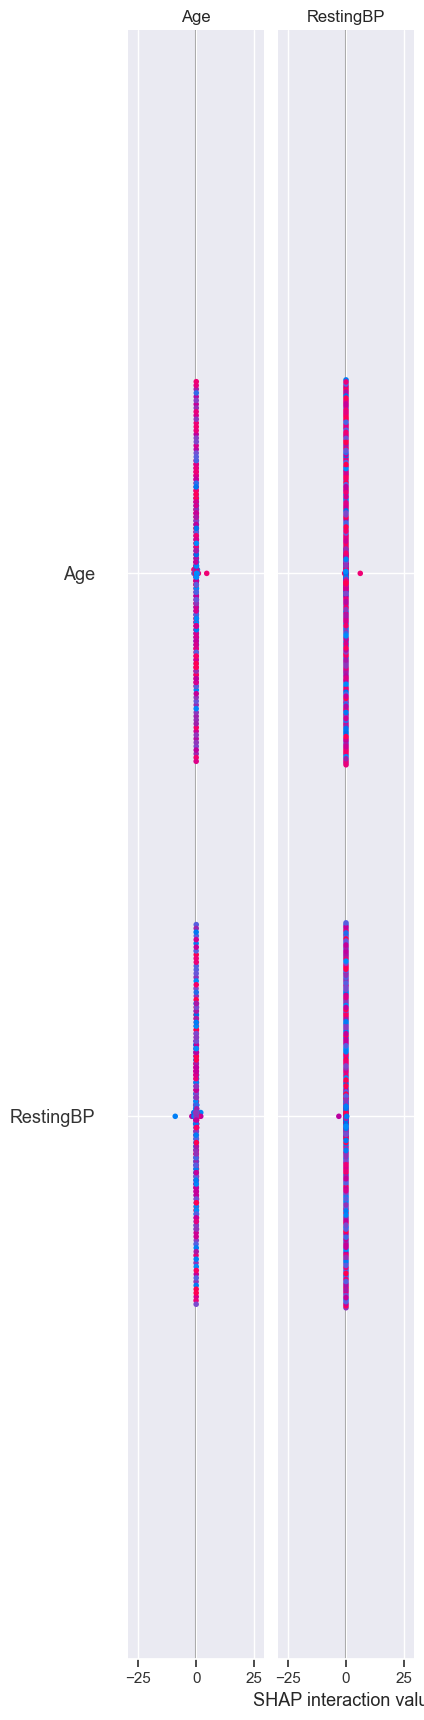

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
shap.summary_plot(shap_values, features=X_scaled, feature_names=X.columns, max_display=len(X.columns))


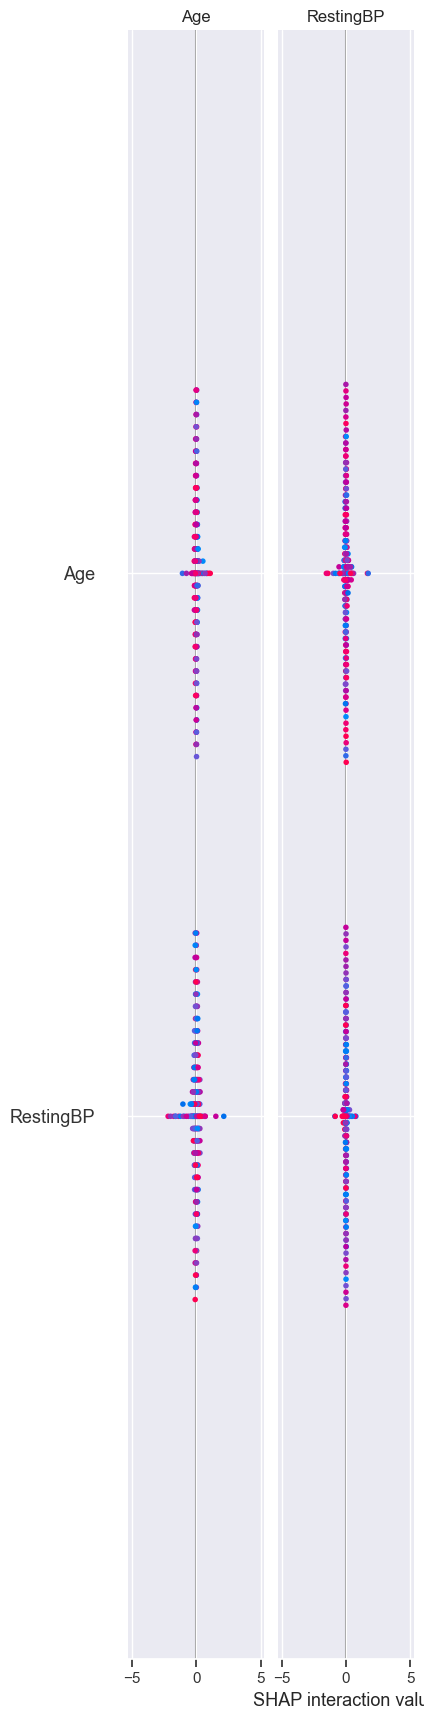

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import shap

# 1️⃣ Scale the Data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert scaled data back to DataFrame for SHAP visualization
X_scaled = pd.DataFrame(x_test_scaled, columns=x_train.columns)

# 2️⃣ SHAP Explanation
explainer = shap.DeepExplainer(model, x_train_scaled)
shap_values = explainer.shap_values(x_test_scaled)

# 3️⃣ SHAP Summary Plot
shap.summary_plot(shap_values, features=X_scaled, feature_names=X_scaled.columns, max_display=len(X_scaled.columns))



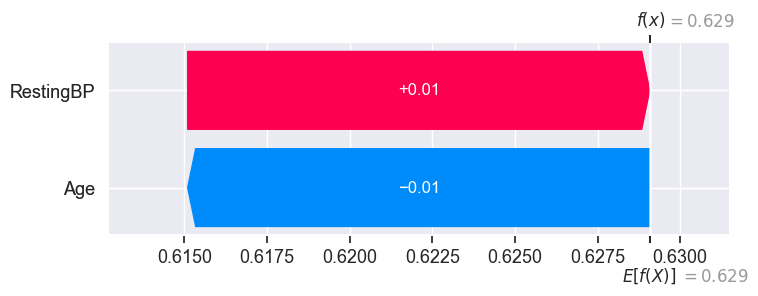

In [48]:
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][0], feature_names = X.columns)

In [52]:
shap.plots.force(explainer.expected_value.numpy(), shap_values[0])

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [58]:
import shap
import numpy as np

# Sample background for DeepExplainer
background = x_train.iloc[np.random.choice(x_train.shape[0], 100, replace=False)]

# DeepExplainer initialization
explainer = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)

# SHAP values for the first 3 test samples
shap_values = explainer.shap_values(x_test[:3].values)

# Initialize JS for visualization
shap.initjs()

# Ensure feature names match SHAP values
shap.force_plot(
    explainer.expected_value[0],
    shap_values[0][0],               # SHAP values for the first sample
    x_test.iloc[0],                  # Corresponding feature values for the first sample
    feature_names=x_train.columns    # Feature names
)


DimensionError: Length of features is not equal to the length of shap_values!

In [59]:
print("SHAP values shape:", shap_values[0][0].shape)
print("Test sample shape:", x_test.iloc[0].shape)
print("Feature names count:", len(x_train.columns))


SHAP values shape: (2,)
Test sample shape: (20,)
Feature names count: 20


In [61]:
# Reshape SHAP values for binary classification
shap_values_binary = shap_values[0]  # Use class 0 if that's the target

# Plotting
shap.force_plot(
    explainer.expected_value[0],
    shap_values_binary[0],
    features=x_test.iloc[0],
    feature_names=x_train.columns
)


DimensionError: Length of features is not equal to the length of shap_values!

In [62]:
print("Class 0 SHAP shape:", shap_values[0].shape)
print("Class 1 SHAP shape:", shap_values[1].shape)


Class 0 SHAP shape: (20, 2)
Class 1 SHAP shape: (20, 2)


In [63]:
background = x_train.sample(100, random_state=42)  # Safer random sampling

# Adjust the explainer to focus on model input
explainer = shap.DeepExplainer(model, background)

# Compute SHAP values
shap_values = explainer.shap_values(x_test[:3].values)

# Debug shapes again
print("Class 0 SHAP shape:", shap_values[0].shape)
print("Class 1 SHAP shape:", shap_values[1].shape)


Class 0 SHAP shape: (20, 2)
Class 1 SHAP shape: (20, 2)


In [65]:
# Force model initialization
model.predict(x_train[:1])  # Run a dummy prediction to initialize tensors

# Now initialize SHAP explainer for Class 1 output
explainer = shap.DeepExplainer((model.input, model.output[:, 1]), background)

# Compute SHAP values
shap_values = explainer.shap_values(x_test[:3].values)

# Check shape
print("Corrected SHAP shape:", shap_values[0].shape)

# Visualize using force plot
shap.force_plot(
    explainer.expected_value,
    shap_values[0][0], 
    features=x_test.iloc[0],
    feature_names=x_train.columns
)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


ValueError: The layer sequential_1 has never been called and thus has no defined input.

In [66]:
from tensorflow.keras import Model, Input

# Define an explicit input layer
inputs = Input(shape=(x_train.shape[1],))
outputs = model(inputs)  # Apply the Sequential model to the input

# Convert to Functional Model
functional_model = Model(inputs=inputs, outputs=outputs)

# Initialize SHAP explainer for Class 1 output
background = x_train.sample(100)  # Using random background
explainer = shap.DeepExplainer((functional_model.input, functional_model.output[:, 1]), background)

# Compute SHAP values
shap_values = explainer.shap_values(x_test[:3].values)

# Visualize using force plot
shap.force_plot(
    explainer.expected_value,
    shap_values[0][0],
    features=x_test.iloc[0],
    feature_names=x_train.columns
)


TypeError: Scalar tensor has no `len()`

In [67]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

# Rebuild model with explicit Input layer
model = Sequential([
    Input(shape=(x_train.shape[1],)),  # Explicit input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')     # Assuming binary classification
])

# Compile and fit (if needed)
# model.compile(...)
# model.fit(...)

# Initialize SHAP explainer
background = x_train.sample(100)
explainer = shap.DeepExplainer((model.input, model.output[:, 1]), background)

# Compute SHAP values
shap_values = explainer.shap_values(x_test[:3].values)


ValueError: The layer sequential_2 has never been called and thus has no defined input.

In [68]:
explainer = shap.KernelExplainer(model.predict,x_train)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Using 688 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [70]:
shap_values = explainer.shap_values(x_test,nsamples=100)

  0%|                                                                                          | 0/230 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 694us/step


  0%|▎                                                                                 | 1/230 [00:02<09:30,  2.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 693us/step


  1%|▋                                                                                 | 2/230 [00:04<09:06,  2.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


  1%|█                                                                                 | 3/230 [00:07<08:51,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


  2%|█▍                                                                                | 4/230 [00:09<08:44,  2.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 699us/step


  2%|█▊                                                                                | 5/230 [00:11<08:46,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 701us/step


  3%|██▏                                                                               | 6/230 [00:14<08:46,  2.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 691us/step


  3%|██▍                                                                               | 7/230 [00:16<08:43,  2.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 693us/step


  3%|██▊                                                                               | 8/230 [00:18<08:39,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step


  4%|███▏                                                                              | 9/230 [00:21<08:37,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step


  4%|███▌                                                                             | 10/230 [00:23<08:40,  2.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step


  5%|███▊                                                                             | 11/230 [00:25<08:32,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 691us/step


  5%|████▏                                                                            | 12/230 [00:28<08:30,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step


  6%|████▌                                                                            | 13/230 [00:30<08:27,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step


  6%|████▉                                                                            | 14/230 [00:32<08:21,  2.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


  7%|█████▎                                                                           | 15/230 [00:35<08:14,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step


  7%|█████▋                                                                           | 16/230 [00:37<08:08,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step


  7%|█████▉                                                                           | 17/230 [00:39<08:07,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step


  8%|██████▎                                                                          | 18/230 [00:41<08:09,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 711us/step


  8%|██████▋                                                                          | 19/230 [00:44<08:13,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 696us/step


  9%|███████                                                                          | 20/230 [00:46<08:10,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step


  9%|███████▍                                                                         | 21/230 [00:48<08:05,  2.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step


 10%|███████▋                                                                         | 22/230 [00:51<08:01,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


 10%|████████                                                                         | 23/230 [00:53<07:54,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step


 10%|████████▍                                                                        | 24/230 [00:55<07:49,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step


 11%|████████▊                                                                        | 25/230 [00:58<07:47,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step


 11%|█████████▏                                                                       | 26/230 [01:00<07:41,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step


 12%|█████████▌                                                                       | 27/230 [01:02<07:36,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step


 12%|█████████▊                                                                       | 28/230 [01:04<07:33,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step


 13%|██████████▏                                                                      | 29/230 [01:06<07:29,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step


 13%|██████████▌                                                                      | 30/230 [01:09<07:26,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step


 13%|██████████▉                                                                      | 31/230 [01:11<07:23,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step


 14%|███████████▎                                                                     | 32/230 [01:13<07:20,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step


 14%|███████████▌                                                                     | 33/230 [01:15<07:18,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step


 15%|███████████▉                                                                     | 34/230 [01:18<07:17,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step


 15%|████████████▎                                                                    | 35/230 [01:20<07:14,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 16%|████████████▋                                                                    | 36/230 [01:22<07:11,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 16%|█████████████                                                                    | 37/230 [01:24<07:09,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step


 17%|█████████████▍                                                                   | 38/230 [01:27<07:10,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step


 17%|█████████████▋                                                                   | 39/230 [01:29<07:08,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step


 17%|██████████████                                                                   | 40/230 [01:31<07:05,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step


 18%|██████████████▍                                                                  | 41/230 [01:33<07:03,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step


 18%|██████████████▊                                                                  | 42/230 [01:35<07:00,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step


 19%|███████████████▏                                                                 | 43/230 [01:38<06:57,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step


 19%|███████████████▍                                                                 | 44/230 [01:40<06:53,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step


 20%|███████████████▊                                                                 | 45/230 [01:42<06:50,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step


 20%|████████████████▏                                                                | 46/230 [01:44<06:49,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step


 20%|████████████████▌                                                                | 47/230 [01:47<06:46,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step


 21%|████████████████▉                                                                | 48/230 [01:49<06:45,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step


 21%|█████████████████▎                                                               | 49/230 [01:51<06:44,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step


 22%|█████████████████▌                                                               | 50/230 [01:53<06:41,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step


 22%|█████████████████▉                                                               | 51/230 [01:55<06:38,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


 23%|██████████████████▎                                                              | 52/230 [01:58<06:37,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step


 23%|██████████████████▋                                                              | 53/230 [02:00<06:34,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step


 23%|███████████████████                                                              | 54/230 [02:02<06:31,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step


 24%|███████████████████▎                                                             | 55/230 [02:04<06:28,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step


 24%|███████████████████▋                                                             | 56/230 [02:07<06:26,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step


 25%|████████████████████                                                             | 57/230 [02:09<06:24,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step


 25%|████████████████████▍                                                            | 58/230 [02:11<06:22,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step


 26%|████████████████████▊                                                            | 59/230 [02:13<06:21,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step


 26%|█████████████████████▏                                                           | 60/230 [02:16<06:21,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step


 27%|█████████████████████▍                                                           | 61/230 [02:18<06:33,  2.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


 27%|█████████████████████▊                                                           | 62/230 [02:20<06:25,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 27%|██████████████████████▏                                                          | 63/230 [02:23<06:23,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step


 28%|██████████████████████▌                                                          | 64/230 [02:25<06:24,  2.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step


 28%|██████████████████████▉                                                          | 65/230 [02:27<06:28,  2.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


 29%|███████████████████████▏                                                         | 66/230 [02:30<06:21,  2.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 29%|███████████████████████▌                                                         | 67/230 [02:32<06:14,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 30%|███████████████████████▉                                                         | 68/230 [02:34<06:09,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 30%|████████████████████████▎                                                        | 69/230 [02:36<06:06,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step


 30%|████████████████████████▋                                                        | 70/230 [02:39<06:02,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step


 31%|█████████████████████████                                                        | 71/230 [02:41<05:57,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step


 31%|█████████████████████████▎                                                       | 72/230 [02:43<05:54,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step


 32%|█████████████████████████▋                                                       | 73/230 [02:45<05:51,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step


 32%|██████████████████████████                                                       | 74/230 [02:48<05:50,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step


 33%|██████████████████████████▍                                                      | 75/230 [02:50<05:48,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step


 33%|██████████████████████████▊                                                      | 76/230 [02:52<05:44,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step


 33%|███████████████████████████                                                      | 77/230 [02:54<05:41,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step


 34%|███████████████████████████▍                                                     | 78/230 [02:57<05:39,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 34%|███████████████████████████▊                                                     | 79/230 [02:59<05:38,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step


 35%|████████████████████████████▏                                                    | 80/230 [03:01<05:38,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step


 35%|████████████████████████████▌                                                    | 81/230 [03:03<05:39,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step


 36%|████████████████████████████▉                                                    | 82/230 [03:06<05:41,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 691us/step


 36%|█████████████████████████████▏                                                   | 83/230 [03:08<05:43,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 697us/step


 37%|█████████████████████████████▌                                                   | 84/230 [03:11<05:41,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step


 37%|█████████████████████████████▉                                                   | 85/230 [03:13<05:36,  2.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 37%|██████████████████████████████▎                                                  | 86/230 [03:15<05:30,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 38%|██████████████████████████████▋                                                  | 87/230 [03:17<05:26,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 38%|██████████████████████████████▉                                                  | 88/230 [03:20<05:31,  2.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step


 39%|███████████████████████████████▎                                                 | 89/230 [03:22<05:34,  2.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step


 39%|███████████████████████████████▋                                                 | 90/230 [03:24<05:28,  2.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 40%|████████████████████████████████                                                 | 91/230 [03:27<05:23,  2.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step


 40%|████████████████████████████████▍                                                | 92/230 [03:29<05:18,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 40%|████████████████████████████████▊                                                | 93/230 [03:31<05:13,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 41%|█████████████████████████████████                                                | 94/230 [03:34<05:10,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


 41%|█████████████████████████████████▍                                               | 95/230 [03:36<05:07,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 42%|█████████████████████████████████▊                                               | 96/230 [03:38<05:03,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 42%|██████████████████████████████████▏                                              | 97/230 [03:40<05:00,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 43%|██████████████████████████████████▌                                              | 98/230 [03:43<04:58,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 43%|██████████████████████████████████▊                                              | 99/230 [03:45<04:56,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step


 43%|██████████████████████████████████▊                                             | 100/230 [03:47<04:53,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


 44%|███████████████████████████████████▏                                            | 101/230 [03:49<04:51,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


 44%|███████████████████████████████████▍                                            | 102/230 [03:52<04:48,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step


 45%|███████████████████████████████████▊                                            | 103/230 [03:54<04:46,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 45%|████████████████████████████████████▏                                           | 104/230 [03:56<04:44,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step


 46%|████████████████████████████████████▌                                           | 105/230 [03:58<04:42,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


 46%|████████████████████████████████████▊                                           | 106/230 [04:01<04:40,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 47%|█████████████████████████████████████▏                                          | 107/230 [04:03<04:38,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 47%|█████████████████████████████████████▌                                          | 108/230 [04:05<04:36,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


 47%|█████████████████████████████████████▉                                          | 109/230 [04:07<04:33,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 48%|██████████████████████████████████████▎                                         | 110/230 [04:10<04:31,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 48%|██████████████████████████████████████▌                                         | 111/230 [04:12<04:29,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step


 49%|██████████████████████████████████████▉                                         | 112/230 [04:14<04:27,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 49%|███████████████████████████████████████▎                                        | 113/230 [04:16<04:24,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 50%|███████████████████████████████████████▋                                        | 114/230 [04:19<04:21,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 50%|████████████████████████████████████████                                        | 115/230 [04:21<04:19,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 50%|████████████████████████████████████████▎                                       | 116/230 [04:23<04:23,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 738us/step


 51%|████████████████████████████████████████▋                                       | 117/230 [04:26<04:32,  2.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 694us/step


 51%|█████████████████████████████████████████                                       | 118/230 [04:28<04:29,  2.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 52%|█████████████████████████████████████████▍                                      | 119/230 [04:31<04:22,  2.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step


 52%|█████████████████████████████████████████▋                                      | 120/230 [04:33<04:16,  2.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step


 53%|██████████████████████████████████████████                                      | 121/230 [04:35<04:12,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 53%|██████████████████████████████████████████▍                                     | 122/230 [04:38<04:08,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 53%|██████████████████████████████████████████▊                                     | 123/230 [04:40<04:04,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 54%|███████████████████████████████████████████▏                                    | 124/230 [04:42<04:01,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step


 54%|███████████████████████████████████████████▍                                    | 125/230 [04:44<03:58,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


 55%|███████████████████████████████████████████▊                                    | 126/230 [04:47<03:55,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


 55%|████████████████████████████████████████████▏                                   | 127/230 [04:49<03:52,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 56%|████████████████████████████████████████████▌                                   | 128/230 [04:51<03:49,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 56%|████████████████████████████████████████████▊                                   | 129/230 [04:53<03:47,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


 57%|█████████████████████████████████████████████▏                                  | 130/230 [04:56<03:45,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step


 57%|█████████████████████████████████████████████▌                                  | 131/230 [04:58<03:45,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 57%|█████████████████████████████████████████████▉                                  | 132/230 [05:00<03:42,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


 58%|██████████████████████████████████████████████▎                                 | 133/230 [05:02<03:40,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


 58%|██████████████████████████████████████████████▌                                 | 134/230 [05:05<03:37,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 59%|██████████████████████████████████████████████▉                                 | 135/230 [05:07<03:34,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step


 59%|███████████████████████████████████████████████▎                                | 136/230 [05:09<03:32,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 60%|███████████████████████████████████████████████▋                                | 137/230 [05:11<03:29,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 60%|████████████████████████████████████████████████                                | 138/230 [05:14<03:30,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step


 60%|████████████████████████████████████████████████▎                               | 139/230 [05:16<03:29,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step


 61%|████████████████████████████████████████████████▋                               | 140/230 [05:18<03:26,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 61%|█████████████████████████████████████████████████                               | 141/230 [05:21<03:23,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 62%|█████████████████████████████████████████████████▍                              | 142/230 [05:23<03:20,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step


 62%|█████████████████████████████████████████████████▋                              | 143/230 [05:25<03:18,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


 63%|██████████████████████████████████████████████████                              | 144/230 [05:27<03:16,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step


 63%|██████████████████████████████████████████████████▍                             | 145/230 [05:30<03:14,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step


 63%|██████████████████████████████████████████████████▊                             | 146/230 [05:32<03:12,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 64%|███████████████████████████████████████████████████▏                            | 147/230 [05:34<03:10,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 64%|███████████████████████████████████████████████████▍                            | 148/230 [05:37<03:07,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 65%|███████████████████████████████████████████████████▊                            | 149/230 [05:39<03:04,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 65%|████████████████████████████████████████████████████▏                           | 150/230 [05:41<03:00,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 66%|████████████████████████████████████████████████████▌                           | 151/230 [05:43<02:58,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step


 66%|████████████████████████████████████████████████████▊                           | 152/230 [05:46<02:56,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


 67%|█████████████████████████████████████████████████████▏                          | 153/230 [05:48<02:53,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step


 67%|█████████████████████████████████████████████████████▌                          | 154/230 [05:50<02:51,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 67%|█████████████████████████████████████████████████████▉                          | 155/230 [05:52<02:49,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step


 68%|██████████████████████████████████████████████████████▎                         | 156/230 [05:55<02:47,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 68%|██████████████████████████████████████████████████████▌                         | 157/230 [05:57<02:44,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step


 69%|██████████████████████████████████████████████████████▉                         | 158/230 [05:59<02:42,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step


 69%|███████████████████████████████████████████████████████▎                        | 159/230 [06:01<02:40,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


 70%|███████████████████████████████████████████████████████▋                        | 160/230 [06:04<02:37,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step


 70%|████████████████████████████████████████████████████████                        | 161/230 [06:06<02:37,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 70%|████████████████████████████████████████████████████████▎                       | 162/230 [06:08<02:34,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 71%|████████████████████████████████████████████████████████▋                       | 163/230 [06:10<02:31,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 71%|█████████████████████████████████████████████████████████                       | 164/230 [06:13<02:29,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 72%|█████████████████████████████████████████████████████████▍                      | 165/230 [06:15<02:27,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step


 72%|█████████████████████████████████████████████████████████▋                      | 166/230 [06:17<02:24,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 73%|██████████████████████████████████████████████████████████                      | 167/230 [06:20<02:22,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 73%|██████████████████████████████████████████████████████████▍                     | 168/230 [06:22<02:19,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 73%|██████████████████████████████████████████████████████████▊                     | 169/230 [06:24<02:17,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step


 74%|███████████████████████████████████████████████████████████▏                    | 170/230 [06:26<02:16,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step


 74%|███████████████████████████████████████████████████████████▍                    | 171/230 [06:29<02:18,  2.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 75%|███████████████████████████████████████████████████████████▊                    | 172/230 [06:31<02:14,  2.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 75%|████████████████████████████████████████████████████████████▏                   | 173/230 [06:33<02:11,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


 76%|████████████████████████████████████████████████████████████▌                   | 174/230 [06:36<02:08,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step


 76%|████████████████████████████████████████████████████████████▊                   | 175/230 [06:38<02:05,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 77%|█████████████████████████████████████████████████████████████▏                  | 176/230 [06:40<02:02,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 77%|█████████████████████████████████████████████████████████████▌                  | 177/230 [06:42<01:59,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step


 77%|█████████████████████████████████████████████████████████████▉                  | 178/230 [06:45<01:57,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 78%|██████████████████████████████████████████████████████████████▎                 | 179/230 [06:47<01:55,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 78%|██████████████████████████████████████████████████████████████▌                 | 180/230 [06:49<01:52,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 79%|██████████████████████████████████████████████████████████████▉                 | 181/230 [06:51<01:50,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 79%|███████████████████████████████████████████████████████████████▎                | 182/230 [06:54<01:47,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


 80%|███████████████████████████████████████████████████████████████▋                | 183/230 [06:56<01:45,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step


 80%|████████████████████████████████████████████████████████████████                | 184/230 [06:58<01:43,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


 80%|████████████████████████████████████████████████████████████████▎               | 185/230 [07:00<01:41,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 81%|████████████████████████████████████████████████████████████████▋               | 186/230 [07:03<01:39,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 81%|█████████████████████████████████████████████████████████████████               | 187/230 [07:05<01:36,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 82%|█████████████████████████████████████████████████████████████████▍              | 188/230 [07:07<01:34,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


 82%|█████████████████████████████████████████████████████████████████▋              | 189/230 [07:09<01:32,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 83%|██████████████████████████████████████████████████████████████████              | 190/230 [07:12<01:29,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 83%|██████████████████████████████████████████████████████████████████▍             | 191/230 [07:14<01:27,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 83%|██████████████████████████████████████████████████████████████████▊             | 192/230 [07:16<01:25,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 84%|███████████████████████████████████████████████████████████████████▏            | 193/230 [07:18<01:23,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 84%|███████████████████████████████████████████████████████████████████▍            | 194/230 [07:21<01:21,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step


 85%|███████████████████████████████████████████████████████████████████▊            | 195/230 [07:23<01:18,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step


 85%|████████████████████████████████████████████████████████████████████▏           | 196/230 [07:25<01:17,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 694us/step


 86%|████████████████████████████████████████████████████████████████████▌           | 197/230 [07:28<01:15,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 86%|████████████████████████████████████████████████████████████████████▊           | 198/230 [07:30<01:12,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step


 87%|█████████████████████████████████████████████████████████████████████▏          | 199/230 [07:32<01:10,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 200/230 [07:34<01:07,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 87%|█████████████████████████████████████████████████████████████████████▉          | 201/230 [07:37<01:05,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 88%|██████████████████████████████████████████████████████████████████████▎         | 202/230 [07:39<01:03,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step


 88%|██████████████████████████████████████████████████████████████████████▌         | 203/230 [07:41<01:01,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 204/230 [07:43<00:58,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 205/230 [07:46<00:56,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 206/230 [07:48<00:54,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 90%|████████████████████████████████████████████████████████████████████████        | 207/230 [07:50<00:51,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 208/230 [07:52<00:49,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 209/230 [07:55<00:47,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 91%|█████████████████████████████████████████████████████████████████████████       | 210/230 [07:57<00:45,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 211/230 [07:59<00:42,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 212/230 [08:01<00:40,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 93%|██████████████████████████████████████████████████████████████████████████      | 213/230 [08:04<00:38,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 214/230 [08:06<00:36,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 93%|██████████████████████████████████████████████████████████████████████████▊     | 215/230 [08:08<00:33,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 216/230 [08:10<00:31,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 217/230 [08:13<00:29,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


 95%|███████████████████████████████████████████████████████████████████████████▊    | 218/230 [08:15<00:27,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step


 95%|████████████████████████████████████████████████████████████████████████████▏   | 219/230 [08:17<00:24,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step


 96%|████████████████████████████████████████████████████████████████████████████▌   | 220/230 [08:20<00:22,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 221/230 [08:22<00:20,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 2s 745us/step


 97%|█████████████████████████████████████████████████████████████████████████████▏  | 222/230 [08:24<00:19,  2.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 223/230 [08:27<00:16,  2.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 224/230 [08:29<00:14,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 225/230 [08:31<00:11,  2.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 226/230 [08:34<00:09,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 227/230 [08:36<00:06,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step


 99%|███████████████████████████████████████████████████████████████████████████████▎| 228/230 [08:38<00:04,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


100%|███████████████████████████████████████████████████████████████████████████████▋| 229/230 [08:40<00:02,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step


100%|████████████████████████████████████████████████████████████████████████████████| 230/230 [08:43<00:00,  2.27s/it]


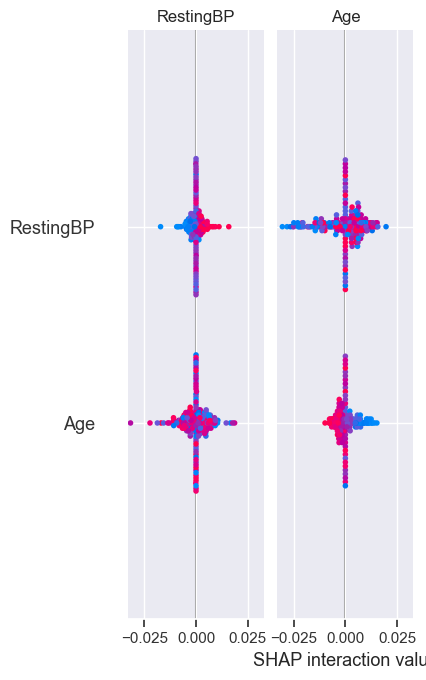

In [74]:
import numpy as np

features = np.array(x_train.columns.tolist())  # Convert to NumPy array
shap.summary_plot(shap_values, x_test, feature_names=features)


In [75]:
print("SHAP values shape:", np.array(shap_values).shape)
print("x_test shape:", x_test.shape)


SHAP values shape: (230, 20, 2)
x_test shape: (230, 20)


In [76]:
# Select SHAP values for Class 1 (index 1)
shap.summary_plot(shap_values[1], x_test, feature_names=x_train.columns)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [84]:
shap.force_plot(
    explainer.expected_value[1],       # Expected value for Class 1
    shap_values[1][0, :],              # SHAP values for first sample (all features)
    x_test.iloc[0],                    # First sample's features
    feature_names=features             # Feature names
)



DimensionError: Length of features is not equal to the length of shap_values!

In [83]:
print("SHAP values length:", len(shap_values[1][0]))    # Should be 20
print("Feature values length:", len(x_test.iloc[0]))    # Should be 20
print("Feature names length:", len(features))           # Should be 20


SHAP values length: 2
Feature values length: 20
Feature names length: 20
